# 2020.05.02 머신러닝 알고리즘 스터디
# Logistic Regression (로지스틱 회귀)

## Connect to Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## 1. 선형 회귀의 문제점

- 다중선형회귀: 수치형 설명변수 X와 연속형 숫자로 이루어진 종속변수 Y 간의 관계를 선형으로 가정하고, 이를 가장 잘 표현할 수 있는 회귀계수를 추정하는 모델(MSE 사용).
- 연속형 숫자 대신 범주형(categorical) 변수를 이용하는 경우를 생각해보자.
- (1) Y가 범주형 변수일 때는 숫자가 아무 의미를 지니지 않는다.
- (2) 직선이 아니라 S자 형태로 표현되는 함수가 성능이 더 좋다. 
- 이러한 문제로 인해 Logistic Regression이 제안되어졌다. <br> <br>
![대체 텍스트](https://drive.google.com/uc?id=1es_PsVdNeP5_eZUXqpd7_jTtZaFZZu2t)
![대체 텍스트](https://drive.google.com/uc?id=1AYrVcdgGETi9l2Mk9e7UwCEYgfHdpBUt)


## 2. Sigmoid Function (시그모이드 함수)

- 실제 많은 사회, 자연현상에서는 특정 변수에 대한 확률값이 선형이 아닌 S-커브 형태를 따르는 경우가 많다.
- 이를 표현해낸 것이 바로 로지스틱 함수(시그모이드 함수)다.
- e: 자연 상수(2.718281....) <br>

![대체 텍스트](https://drive.google.com/uc?id=1olnHkGOHi1sZ0oE7qI5XKd_9253Ny5mP) 

### 도출 과정

#### (1) odds
- odds는 실패확률에 대한 성공 확률의 비율
- odds는 0 ~ 무한대의 범위를 갖는다.

#### (2) log
- 자연 log를 취하면,(-무한대) ~ (무한대) 의 범위를 갖는다.

![대체 텍스트](https://drive.google.com/uc?id=1a6ELffG3dQrdT4zU-HwMJp3pUZl-hc_Z) <br><br>
양변을 e의 제곱꼴로 바꿔준다. <br><br>

![대체 텍스트](https://drive.google.com/uc?id=1R3GDNY5AwuH9S71VJvSp_KEnIb0aLL3U) <br><br>
p에 관한 식으로 바꿔준다. <br>
1.역수를 취한다. <br><br>
![대체 텍스트](https://drive.google.com/uc?id=1fuobRVf7X2Yytktr-EU5skLyLptxufkn) <br><br>
2.한 번 더 역수를 취한다. <br><br>
![대체 텍스트](https://drive.google.com/uc?id=1yqsVBN4A_DT6evFpcwu0ELSfdKgm1wrh) <br><br>
3.p에 관한 식으로 정리한다. <br><br>
![대체 텍스트](https://drive.google.com/uc?id=1bqSQrxnDb7aiDjcwH-jNG6SI7fhGP-S8)


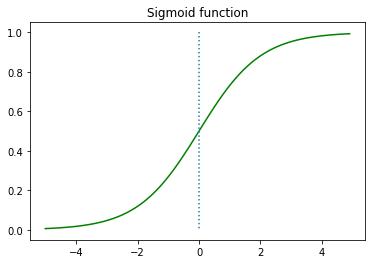

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

'''
  @brief  sigmoid function
'''
def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y, 'g')
# add the dot in the middle
plt.plot([0,0], [1.0,0.0], ":")
plt.title("Sigmoid function")
plt.show()

- 출력값을 0과 1 사이의 값으로 조정하여 반환한다.
- x가 증가: 1에 수렴
- x가 감소: 0에 수렴

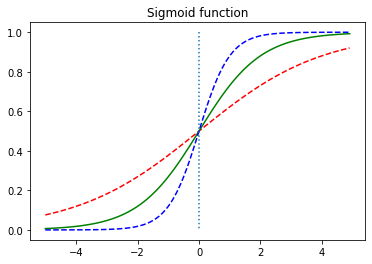

In [5]:
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x,y1, 'r', linestyle='--') # W == 0.5
plt.plot(x,y2, 'g') # W == 1.0
plt.plot(x,y3, 'b', linestyle='--') # W == 2.0

# add the dot in the middle
plt.plot([0,0], [1.0,0.0], ":")
plt.title("Sigmoid function")
plt.show()

- W값 증가 -> 경사 증가
- W값 감소 -> 경사 감소

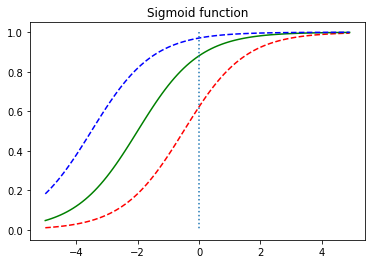

In [6]:
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+2)
y3 = sigmoid(x+3.5)

plt.plot(x,y1, 'r', linestyle='--') # b == 0.5
plt.plot(x,y2, 'g') # b == 2.0
plt.plot(x,y3, 'b', linestyle='--') # b == 3.5

# add the dot in the middle
plt.plot([0,0], [1.0,0.0], ":")
plt.title("Sigmoid function")
plt.show()

- b값 증가 -> 그래프가 위쪽으로 이동
- 이진 분류 방법에 많이 사용.
- 0.5 이상이면 1(True), 0.5 이하이면 0(False)

### 선형 회귀와의 차이점

![대체 텍스트](https://drive.google.com/uc?id=1bf-kQeYfeFOx17f5tvk0Tw2lEZFB58mj)

## 3. Cost Function (비용 함수)

### MSE를 사용하는 경우 : 문제 발생

![대체 텍스트](https://drive.google.com/uc?id=1u52D8MAfHfKJWTpm50ifxGYNclD4_enD)

- 잘못된 최소값에 빠지는 경우가 존재.
- 글로벌 미니멈(Global Minimum)이 아닌 로컬 미니멈(Local Minimum)에 도달하는 경우가 발생.
- local minimum에서는 cost가 최소화되지 않는다.

### - Cross Entropy (교차 엔트로피)

- 실제값이 0일 때, y값이 1에 가까워지는 오차 증가(빨간색 그래프)
- y값이 0이면, cost는 0
- 실제값이 1일 때, y값이 0에 가까워지면 오차 증가(파란색 그래프)
- y값이 1이면, cost는 0

![대체 텍스트](https://drive.google.com/uc?id=1meeEqK3vY8FZV4iJMeYFzv25As3YlUf8) <br>
![대체 텍스트](https://drive.google.com/uc?id=1av2aRrrC-8UNgN22l5XfrRpA3C5OnM90)

결과적으로 위 그래프는 다음과 같은 하나의 식으로 표현할 수 있다. <br>
![대체 텍스트](https://drive.google.com/uc?id=1oaOs-8h1ZmR5V0kSLh-hYPBnoXP78PGF) <br>

- y값이 0이면, 첫번째 항 제거
- y값이 1이면, 두번째 항 제거

결과적으로 로지스틱 회귀의 목적 함수는 아래와 같다. <br>
![대체 텍스트](https://drive.google.com/uc?id=1qb0hLxDxrixElolKfIC4GoXvOR0_08ci)

## 4. Optimizer

- 선형 회귀와 동일하게 gradient descent (경사하강법 사용)

## 5. Applied Field (응용 분야)

### 의학, 소셜 분석을 포함한 다양한 분야에서 많이 사용.

- Trauma and Injury Severity Score(TRISS): 부상 입은 환자들의 사망 예측을 위해 사용.
- 관찰된 환자의 특성(나이, 성별, 피검사 결과등)을 기반으로 환자의 특정 병 감염 여부를 예측한다.

## 6. Keras 예제

- 임의의 숫자들 X 중 10 이상은 1, 10 미만은 0을 부여한 레이블 데이터를 y라고 가정하자.
- activation function: sigmoid
- optimizer: sgd(stochastic gradient)
- loss function: cross-entropy

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

X=np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y=np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

model=Sequential()
# add the dense layer
# activation function: sigmoid
model.add(Dense(1, input_dim=1, activation='sigmoid'))
sgd=optimizers.SGD(lr=0.01)

# 옵티마이저는 경사하강법 sgd를 사용합니다.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
model.compile(optimizer=sgd ,loss='binary_crossentropy',metrics=['binary_accuracy'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.
model.fit(X,y, batch_size=1, epochs=200, shuffle=False)

Epoch 1/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4897 - binary_accuracy: 0.9231
Epoch 2/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4691 - binary_accuracy: 0.9231
Epoch 3/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4485 - binary_accuracy: 0.9231
Epoch 4/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4281 - binary_accuracy: 0.9231
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4078 - binary_accuracy: 0.9231
Epoch 6/200
13/13 [==============================] - 0s 1ms/step - loss: 0.3877 - binary_accuracy: 0.9231
Epoch 7/200
13/13 [==============================] - 0s 1ms/step - loss: 0.3678 - binary_accuracy: 0.9231
Epoch 8/200
13/13 [==============================] - 0s 1ms/step - loss: 0.3482 - binary_accuracy: 0.9231
Epoch 9/200
13/13 [==============================] - 0s 1ms/step - loss: 0.3290 - binary_accuracy: 0.9231
Epoch 10/200
13/13 [==========================

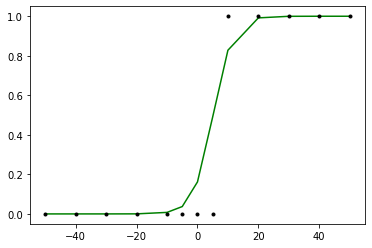

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'g', X, y, 'k.')

In [5]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.21034713]
 [0.26870224]
 [0.33635074]
 [0.41144818]
 [0.45086575]]
[[0.8691359 ]
 [0.9939972 ]
 [0.9997578 ]
 [0.99999034]
 [1.        ]]


## Reference
- https://ratsgo.github.io/machine%20learning/2017/04/02/logistic/
- https://wikidocs.net/22881
- https://ko.wikipedia.org/wiki/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80